In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

In [2]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = X @ w + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

In [3]:
true_w = torch.tensor([0.15, -0.2, 0.1])
true_b = 0.2
features, labels = synthetic_data(true_w, true_b, 2000)

In [4]:
print('Features:', features[0], '\nLabel:', labels[0])

Features: tensor([1.9269, 1.4873, 0.9007]) 
Label: tensor([0.2770])


In [ ]:
# `nn` is an abbreviation for neural networks
from torch import nn

net = nn.Sequential(nn.Linear(3, 1))

In [ ]:
net[0].weight.data.normal_(1, 0.01)
net[0].bias.data.fill_(1)

tensor([1.])

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 2.1447, -0.3438,  0.9131],
        [ 0.1211,  0.2984,  1.3448],
        [ 1.8795, -2.4740,  1.3030],
        [-0.6941, -0.9816, -0.0556],
        [-0.6164,  1.0153,  0.5953],
        [-0.5714,  0.7842,  0.4095],
        [ 1.2097,  0.8767,  1.8313],
        [-0.6664,  0.4921, -0.9834],
        [-0.3370, -1.1753,  0.3581],
        [-0.1277,  0.0366,  0.5164],
        [-1.6022,  1.3529,  1.2888],
        [ 1.1610, -1.7791,  0.8086],
        [ 0.7456, -0.4641,  0.3541],
        [ 1.9378, -0.5536, -1.3030],
        [ 1.2010,  0.6756, -1.8900],
        [-0.3197, -0.9131,  1.9192],
        [ 0.9801,  0.1196, -0.0612],
        [ 0.6664, -0.0743, -0.2096],
        [ 0.1111,  0.3885,  0.5479],
        [ 0.1375, -0.1533,  1.2170]]) 
 tensor([[ 0.6771],
        [ 0.2912],
        [ 1.1110],
        [ 0.2879],
        [-0.0412],
        [-0.0217],
        [ 0.3929],
        [-0.0979],
        [ 0.4302],
        [ 0.2235],
        [-0.1889],
        [ 0.7922],
        [ 0.4265],
        [ 

In [ ]:
def mse(feat, lab):
  diff = torch.sub(feat, lab)
  square = torch.mul(diff, diff)
  return torch.mean(square)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

In [ ]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [ ]:
lre = 0.2
num_epochs = 25

for epoch in range(num_epochs):
    for X, y in data_iter:

        l = mse(net(X), y)
        l.backward()

        net[0].weight.grad.data.zero_()
        net[0].bias.grad.data.zero_()

        
        net[0].weight.data = net[0].weight.data - lre * net[0].weight.grad.data
        net[0].bias.data = net[0].bias.data - lre * net[0].bias.grad.data

    l = mse(net(features),labels)

    print(f'Epoch {epoch + 1}, Loss {l:f}')

Epoch 1, Loss 3.543106
Epoch 2, Loss 3.543106
Epoch 3, Loss 3.543106
Epoch 4, Loss 3.543106
Epoch 5, Loss 3.543106
Epoch 6, Loss 3.543106
Epoch 7, Loss 3.543106
Epoch 8, Loss 3.543106
Epoch 9, Loss 3.543106
Epoch 10, Loss 3.543106
Epoch 11, Loss 3.543106
Epoch 12, Loss 3.543106
Epoch 13, Loss 3.543106
Epoch 14, Loss 3.543106
Epoch 15, Loss 3.543106
Epoch 16, Loss 3.543106
Epoch 17, Loss 3.543106
Epoch 18, Loss 3.543106
Epoch 19, Loss 3.543106
Epoch 20, Loss 3.543106
Epoch 21, Loss 3.543106
Epoch 22, Loss 3.543106
Epoch 23, Loss 3.543106
Epoch 24, Loss 3.543106
Epoch 25, Loss 3.543106


In [ ]:
import torchvision
from torchvision import transforms

# `ToTensor()` converts the image data from PIL type to 32-bit floating point
# tensors. It also divides all numbers by 255, so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.MNIST(
    root="../data", train=False, transform=trans, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
def get_nums_mnist_labels(labels):
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['zero', 'one', 'two', 'three', 'four',
                   'five', 'six', 'seven', 'eight', 'nine']
    return [text_labels[int(i)] for i in labels]

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    plt.tight_layout()
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

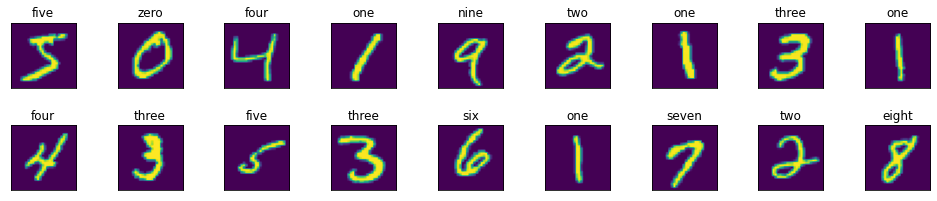

In [ ]:
X, y = next(iter(torch.utils.data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_nums_mnist_labels(y));

In [ ]:
batch_size = 100

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True, 
                                         num_workers=2)

In [ ]:
def load_data_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.MNIST(
        root="../data", train=False, transform=trans, download=True)
    mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [30000, 30000],
                                                           generator=torch.Generator().manual_seed(42))
    return (torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=2),
            torch.utils.data.DataLoader(mnist_val, batch_size, shuffle=False,
                            num_workers=2),
            torch.utils.data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=2))

In [ ]:
train_iter, val_iter, test_iter = load_data_mnist(batch_size)

In [ ]:
from torch import nn
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(1,0.1)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
lr = 0.15
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
def evaluate_accuracy(net, data_iter):
    """Compute the accuracy for a model on a dataset."""
    net.eval()  # Set the model to evaluation mode

    total_loss = 0
    total_hits = 0
    total_samples = 0
    with torch.no_grad():
        for X, y in data_iter:
            y_hat = net(X)
            l = loss(y_hat, y)
            total_loss += float(l)
            total_hits += sum(net(X).argmax(axis=1).type(y.dtype) == y)
            total_samples += y.numel()
    return float(total_loss) / len(data_iter), float(total_hits) / total_samples  * 100

In [ ]:
def train_epoch(net, train_iter, loss, optimizer):  
    # Set the model to training mode
    net.train()
    # Sum of training loss, sum of training correct predictions, no. of examples
    total_loss = 0
    total_hits = 0
    total_samples = 0
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        # Using PyTorch built-in optimizer & loss criterion
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        total_loss += float(l)
        total_hits += sum(y_hat.argmax(axis=1).type(y.dtype) == y)
        total_samples += y.numel()
    # Return training loss and training accuracy
    return float(total_loss) / len(train_iter), float(total_hits) / total_samples  * 100

In [ ]:
def train(net, train_iter, val_iter, loss, num_epochs, optimizer):
    """Train a model."""
    train_loss_all = []
    train_acc_all = []
    val_loss_all = []
    val_acc_all = []
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(net, train_iter, loss, optimizer)
        train_loss_all.append(train_loss)
        train_acc_all.append(train_acc)
        val_loss, val_acc = evaluate_accuracy(net, val_iter)
        val_loss_all.append(val_loss)
        val_acc_all.append(val_acc)
        print(f'Epoch {epoch + 1}, Train loss {train_loss:.2f}, Train accuracy {train_acc:.2f}, Validation loss {val_loss:.2f}, Validation accuracy {val_acc:.2f}')

    return train_loss_all, train_acc_all, val_loss_all, val_acc_all

In [ ]:
num_epochs = 15
train_loss_all, train_acc_all, val_loss_all, val_acc_all = train(net, train_iter, val_iter, loss, num_epochs, optimizer)

Epoch 1, Train loss 0.61, Train accuracy 83.15, Validation loss 0.42, Validation accuracy 88.45
Epoch 2, Train loss 0.38, Train accuracy 89.45, Validation loss 0.37, Validation accuracy 89.67
Epoch 3, Train loss 0.34, Train accuracy 90.31, Validation loss 0.35, Validation accuracy 90.13
Epoch 4, Train loss 0.32, Train accuracy 90.77, Validation loss 0.34, Validation accuracy 90.56
Epoch 5, Train loss 0.31, Train accuracy 91.21, Validation loss 0.33, Validation accuracy 90.67
Epoch 6, Train loss 0.30, Train accuracy 91.49, Validation loss 0.33, Validation accuracy 90.68
Epoch 7, Train loss 0.30, Train accuracy 91.66, Validation loss 0.32, Validation accuracy 90.82
Epoch 8, Train loss 0.29, Train accuracy 91.79, Validation loss 0.32, Validation accuracy 91.05
Epoch 9, Train loss 0.29, Train accuracy 91.97, Validation loss 0.32, Validation accuracy 91.06
Epoch 10, Train loss 0.28, Train accuracy 92.17, Validation loss 0.32, Validation accuracy 90.92
Epoch 11, Train loss 0.28, Train accura

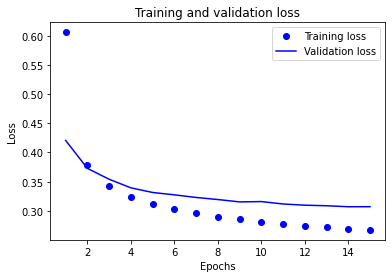

In [ ]:
def plot_loss(train_loss_all, val_loss_all):
    epochs = range(1, len(train_loss_all) + 1) 
    plt.plot(epochs, train_loss_all, 'bo', label='Training loss') 
    plt.plot(epochs, val_loss_all, 'b', label='Validation loss') 
    plt.title('Training and validation loss') 
    plt.xlabel('Epochs') 
    plt.ylabel('Loss') 
    plt.legend()  
    plt.show()

plot_loss(train_loss_all, val_loss_all)

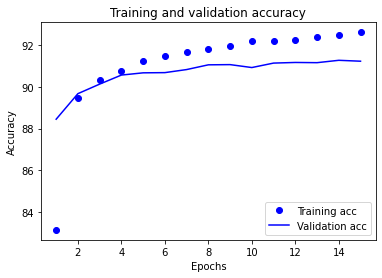

In [ ]:
def plot_accuracy(train_acc_all, val_acc_all):
    epochs = range(1, len(train_acc_all) + 1)
    plt.plot(epochs, train_acc_all, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_all, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy') 
    plt.legend()
    plt.show()

plot_accuracy(train_acc_all, val_acc_all)

In [ ]:
test_loss, test_acc = evaluate_accuracy(net, test_iter)
print(f'Test loss {test_loss:.2f}, Test accuracy {test_acc:.2f}')

Test loss 0.28, Test accuracy 92.26


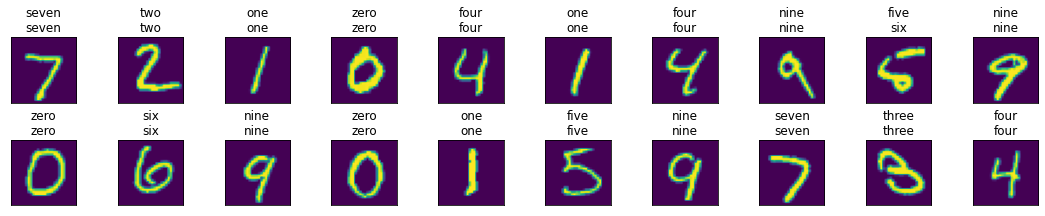

In [ ]:
def predict(net, test_iter, n=20):
    """Predict labels."""
    for X, y in test_iter:
        break
    trues = get_nums_mnist_labels(y)
    preds = get_nums_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(X[0:n].reshape((n, 28, 28)), 2, int(n/2), titles=titles[0:n])

predict(net, test_iter)